# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 168.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 187.7 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 145.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
## Write your code here
duplicate_rows = df.duplicated().sum() 
print(f'Number of duplicates row is: {duplicate_rows}')

Number of duplicates row is: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
## Write your code here
missing_value = df['CodingActivities'].isnull().sum()
print(f'Missing value in Coding Activities column is: {missing_value}')

Missing value in Coding Activities column is: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
df['CodingActivities'] = df['CodingActivities'].ffill()

In [9]:
df['CodingActivities'].head(10)

0                                                Hobby
1    Hobby;Contribute to open-source projects;Other...
2    Hobby;Contribute to open-source projects;Other...
3    Hobby;Contribute to open-source projects;Other...
4    Hobby;Contribute to open-source projects;Other...
5    Hobby;Contribute to open-source projects;Other...
6                         I don’t code outside of work
7                         I don’t code outside of work
8                                                Hobby
9                             Bootstrapping a business
Name: CodingActivities, dtype: object

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
## Write your code here
df['ConvertedCompYearly'].head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: ConvertedCompYearly, dtype: float64

In [11]:
df_nonan = df['ConvertedCompYearly'].notna().sum()     # hitung non-NaN
print(df_nonan)

23435


In [12]:
df_nan = df['ConvertedCompYearly'].isna().sum()
print(df_nan)  # hitung NaN

42002


In [13]:
#Because in the column ConvertedCompYearly we have many NAN, we can change it to meadian, mean or 0

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [14]:
# Change to median
#.fillna(median_val) → mengganti semua NaN dengan nilai median.
median_val = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly_filled'] = df['ConvertedCompYearly'].fillna(median_val)

# Normalisasi manual
min_val = df['ConvertedCompYearly_filled'].min()
max_val = df['ConvertedCompYearly_filled'].max()

df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly_filled'] - min_val) / (max_val - min_val)

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_filled', 'ConvertedCompYearly_MinMax']].head())


   ConvertedCompYearly  ConvertedCompYearly_filled  ConvertedCompYearly_MinMax
0                  NaN                     65000.0                    0.003998
1                  NaN                     65000.0                    0.003998
2                  NaN                     65000.0                    0.003998
3                  NaN                     65000.0                    0.003998
4                  NaN                     65000.0                    0.003998


In [15]:
df['ConvertedCompYearly_filled'].nunique()

6113

In [16]:
#cek apakah nilai 65000.0 diaplikasikan ke semua nilai di kolom
#kesimpulannya median hanya untuk pengganti Nan
df_filtered = df[df['ConvertedCompYearly_filled'] != 65000.0]

# Mencetak 5 baris pertama dari hasil filter
print(df_filtered.head())

     ResponseId                                         MainBranch  \
72           73                     I am a developer by profession   
374         375  I am not primarily a developer, but I write co...   
379         380                     I am a developer by profession   
385         386                     I am a developer by profession   
389         390                     I am a developer by profession   

                 Age                                         Employment  \
72   18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374  25-34 years old                                Employed, full-time   
379  35-44 years old                                Employed, full-time   
385  35-44 years old  Independent contractor, freelancer, or self-em...   
389  25-34 years old             Employed, full-time;Student, part-time   

                               RemoteWork   Check  \
72   Hybrid (some remote, some in-person)  Apples   
374  Hybrid (some remo

In [31]:
#atau bisa dengan menggunakan notna() yang digunakan untuk mengecek menggunakan boolean 
#false value menandakan jika data kosong/NaN
df['ConvertedCompYearly'].notna()


0        False
1        False
2        False
3        False
4        False
         ...  
65432    False
65433    False
65434    False
65435    False
65436    False
Name: ConvertedCompYearly, Length: 65437, dtype: bool

In [32]:
df['ConvertedCompYearly_filled'].notna()


0        True
1        True
2        True
3        True
4        True
         ... 
65432    True
65433    True
65434    True
65435    True
65436    True
Name: ConvertedCompYearly_filled, Length: 65437, dtype: bool

In [17]:
is_within_range = df['ConvertedCompYearly_MinMax'].between(0, 1).all()
print("Semua nilai dalam range 0–1?", is_within_range)


Semua nilai dalam range 0–1? True


In [18]:
outliers = df[~df['ConvertedCompYearly_MinMax'].between(0, 1, inclusive='both')]
if not outliers.empty:
    print("Ada nilai di luar 0–1:")
    print(outliers[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']])
else:
    print("Semua nilai valid dalam 0–1 range.")

Semua nilai valid dalam 0–1 range.


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [21]:
#memasukkan data yang sudah tidak ada NaN

mean_val = df['ConvertedCompYearly_filled'].mean()

print(mean_val)

std_val = df['ConvertedCompYearly_filled'].std()

print(std_val)

72576.3582835399
112220.68159721408


In [24]:
df.loc[df['ConvertedCompYearly_filled'].notna(), 'ConvertedCompYearly_Zscore'] = \
    (df['ConvertedCompYearly_filled'] - mean_val) / std_val

In [28]:
print(df[['ConvertedCompYearly_filled', 'ConvertedCompYearly_Zscore']].head(10))

   ConvertedCompYearly_filled  ConvertedCompYearly_Zscore
0                     65000.0                   -0.067513
1                     65000.0                   -0.067513
2                     65000.0                   -0.067513
3                     65000.0                   -0.067513
4                     65000.0                   -0.067513
5                     65000.0                   -0.067513
6                     65000.0                   -0.067513
7                     65000.0                   -0.067513
8                     65000.0                   -0.067513
9                     65000.0                   -0.067513


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


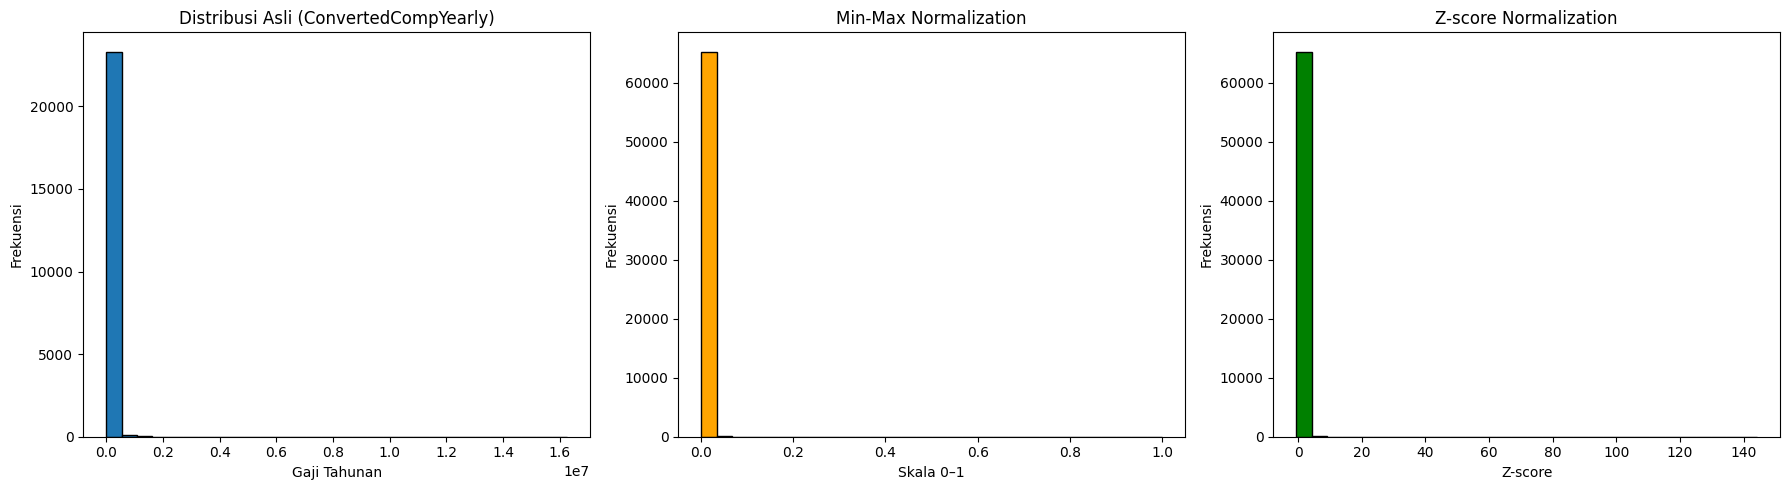

In [33]:
import matplotlib.pyplot as plt

# Buat figure dengan 3 subplot sejajar
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram data asli
axes[0].hist(df['ConvertedCompYearly'].dropna(), bins=30, edgecolor='black')
axes[0].set_title("Distribusi Asli (ConvertedCompYearly)")
axes[0].set_xlabel("Gaji Tahunan")
axes[0].set_ylabel("Frekuensi")

# Histogram Min-Max
axes[1].hist(df['ConvertedCompYearly_MinMax'].dropna(), bins=30, edgecolor='black', color='orange')
axes[1].set_title("Min-Max Normalization")
axes[1].set_xlabel("Skala 0–1")
axes[1].set_ylabel("Frekuensi")

# Histogram Z-score
axes[2].hist(df['ConvertedCompYearly_Zscore'].dropna(), bins=30, edgecolor='black', color='green')
axes[2].set_title("Z-score Normalization")
axes[2].set_xlabel("Z-score")
axes[2].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.
